In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib



In [32]:
# Load data
df = pd.read_csv("final_sleep_data_for_testing.csv")

# Combine start_time and end_time into a readable range (optional for graph/report)
df['timestamp'] = df['start_time'] + ' - ' + df['end_time']

# Save separately if needed for reporting later
df_for_report = df.copy()

# Prepare features and labels for model
X = df[['heart_rate', 'spo2']]
y = df['apnea']



In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [35]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

✅ Accuracy: 75.96%

📋 Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      5232
         1.0       0.21      0.01      0.03      1569

    accuracy                           0.76      6801
   macro avg       0.49      0.50      0.45      6801
weighted avg       0.64      0.76      0.67      6801



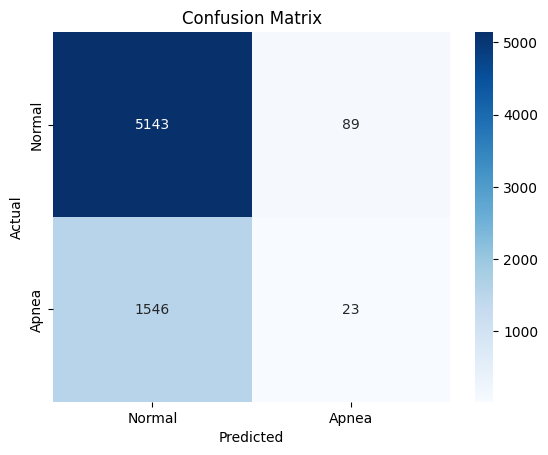

In [36]:
y_pred = model.predict(X_test)

print("✅ Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal','Apnea'], yticklabels=['Normal','Apnea'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
joblib.dump(model, "naive_bayes_apnea_model.pkl")
joblib.dump(scaler, "naive_bayes_scaler.pkl")
print("✅ Saved model and scaler.")


✅ Saved model and scaler.
